# **Introduction to Probabilistic Thinking and Programming** (Part 1)

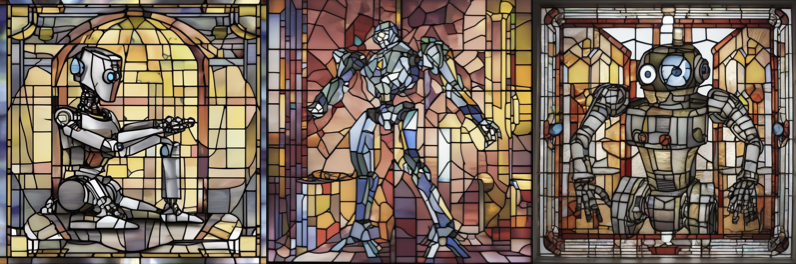




<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Probabilistic_Thinking_and_Programming/Probabilistic_Thinking_and_Programming_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2024. Apache License 2.0.

**Authors:** Sicelukwanda Zwane, Elizaveta Semenova, Josie Rey, Kira Düsterwald & James Allingham

**Reviewers:** Ruan van der Merwe, Tali Beynon, Ruan de Kock & Mohamed Serrhini

## **Welcome**

**Introduction:**

Probabilistic thinking and working with probability distributions are very powerful tools for any machine learning practitioner.

This practical introduces a powerful approach to solving real-world problems called **probabilistic programming**, and builds a helpful foundation for reasoning about probabilistic models and events. Even if you've never encountered probabilistic programming before, we hope that the following exercises and content will help you to apply this paradigm to your projects.

Regardless of your familiarity with probabilistic programming,  you can take away some useful knowledge from this practical. To help you make the most of its content, we've split the practical into two parts.

The first (which is where you are at the moment!) is all about probability distributions and random variables. With this foundational knowledge in place, you can move on to our second part, which centres Bayesian reasoning.

Within each part, we have labelled the sections by the amount of prior knowledge they assume, namely, as 'Beginner', 'Intermediate' and 'Advanced'.

Feel welcome to step in and out of each section and follow your curiosity as you move through the prac!

**Topics:**

Content: <font color='red'>`Bayesian Probability`</font>, <font color='purple'>`Probabilistic Programming`</font>
Level: <font color='blue'>`Beginner`</font>

**Aims/Learning Objectives:**

* [<font color='blue'>`Beginner`</font>] Understand what random variables and probability distributions are.
* [<font color='blue'>`Beginner`</font>] Be able to work with probability distributions using `numpyro`.

**Prerequisites:**

* Basic machine learning (e.g., simple supervised and unsupervised machine learning techniques).
* Basic calculus (e.g., computing an integral and taking derivatives to solve min/max optimisation problems).
* Python programming (with `jax` and `numpy`).

**Outline:**

>[Introduction to Probabilistic Thinking and Programming (Part 1)](#scrollTo=oXhUKM4pmkGc)

>>[Welcome](#scrollTo=f80Wj_FP_3Oi)

>>[Installation and Imports](#scrollTo=6EqhIg1odqg0)

>>[Probabilistic Foundations 🎲](#scrollTo=ZNlT8E41STXX)

>>>[So what is a random variable?](#scrollTo=ZNlT8E41STXX)

>>>[What about a probability distribution?](#scrollTo=ZNlT8E41STXX)

>>>[🔧 Group Task (A1)](#scrollTo=y49yYWn9jNNo)

>>>>[💡 Answer (A1)](#scrollTo=stTC94rWjNNp)

>>>[A Word on Notation...](#scrollTo=G_ywY52HjNNp)

>>>[The Bernoulli Distribution](#scrollTo=5czMPIKY2c2y)

>>>[🔧 Group Task (A2)](#scrollTo=1uA5fHb7jNNs)

>>>>[💡 Answer (A2)](#scrollTo=1Rz5eM0wjNNs)

>>>[The Categorical Distribution](#scrollTo=4LDwuZo4dy_h)

>>>[🔧 Group Task (A3)](#scrollTo=fvSdyJGjjNNu)

>>[⭐ Continuous Distributions](#scrollTo=n4jF-YFRjNNu)

>>>[The (Continuous) Uniform Distribution](#scrollTo=q95K-YzwjNNv)

>>>[The Normal Distribution](#scrollTo=36pozJ3WjNNv)

>>>>[🔧 Group Task (A4)](#scrollTo=PPi_zdZvjNNv)

>>>>>[💡 Answer (A4)](#scrollTo=tVF4DYlwjNNw)

>>>>[🤖 Code Task 1](#scrollTo=9yDor7iBjNNw)

>>>>>[☑️ Test your code](#scrollTo=qRCmykCajNNw)

>>>>>[💡 Answer (Code Task 1)](#scrollTo=U5Dfv5pBjNNw)

>>>[Expected Values](#scrollTo=W2okU56XjNNx)

>>>>[🔧 Group Task (A5)](#scrollTo=3CRsh-jBjNNx)

>>>>>[💡 Answer (A5)](#scrollTo=tago3IP_jNNx)

>>>[Computing Expected Values: Monte Carlo Estimation](#scrollTo=eanqiQ7OjNNx)

>>>>[🔧 Group Task (A6)](#scrollTo=unrnfv9mjNNy)

>>>>>[💡 Answer (A6)](#scrollTo=_Xtk0QDXjNNy)

>>>[The Beta Distribution](#scrollTo=0-VJPjKuldUF)

>>[⭐ Multivariate Distributions](#scrollTo=Eb2y5gw9dz3v)

>>>[The Multivariate Normal Distribution](#scrollTo=-CE_lldLjNNz)

>>>[Relationships between Variables](#scrollTo=-CE_lldLjNNz)

>>>[The Sum and Product Rules](#scrollTo=AdSfc6AEdz3y)

>>>>[Marginal Distributions & the Sum Rule](#scrollTo=f3UcJLfUjaLu)

>>>>[🔧 Group Task (A7)](#scrollTo=unm-tsT6qnV6)

>>>>>[💡 Answer (A7)](#scrollTo=HI_WYP24qrqJ)

>>>>[Conditional Distributions & the Product Rule](#scrollTo=iDqcvQ8doA-j)

>>>>[🔧 Group Task (A8)](#scrollTo=efd0aIqOjNN1)

>>>>>[💡 Answer (A8)](#scrollTo=qQ6oiwbgwBU9)

>>[🤖 Numpyro: Batch and Event Shapes](#scrollTo=5dnSEOspdz32)

>>[➡️ Next Steps...](#scrollTo=XsuEf7hgjNN4)

**Before you start:**

Note for this practical you, do not need to use a GPU or TPU, so feel free to use a CPU runtime: "Runtime" > "Change runtime type" > "CPU".

**Important:** you will also need to go to "Tools" > "Settings" > "Miscellaneous" > check "Crab Mode".

**Suggested experience level in this topic:**

| Level         | Experience                            |
| --- | --- |
`Beginner`      | I've never worked with probability distributions before. |
`Intermediate`  | I'm somewhat comfortable with probability distributions, but I don't know about Bayesian inference. |
`Advanced`      | I'm a Bayesian at heart, but I want to know how to do it more easily! |

In [2]:
# **Paths to follow:** What is your level of experience in the topics presented in this notebook? (Run Cell)
experience = "beginner" #@param ["beginner", "intermediate", "advanced"]

sections_to_follow=""

if experience == "beginner":
  sections_to_follow="Part A (skip any intermediate sections) -> [Optional] Part B (up to the first intermediate section)"
elif experience == "intermediate":
  sections_to_follow="Skim Part A -> Part B (skip any advanced sections)"
elif experience == "advanced":
  sections_to_follow="Skim Part B -> Part C"

print(f"Based on your experience, it is advised you follow this path:\n {sections_to_follow}.\n Note this is just a guideline.")

Based on your experience, it is advised you follow this path:
 Part A (skip any intermediate sections) -> [Optional] Part B (up to the first intermediate section).
 Note this is just a guideline.


## **Installation and Imports**

Run the following cells to set up our working environment and helper functions.

In [ ]:
## Install anything required. Capture hides the output from the cell.
## Run this cell only one time.

!pip install numpyro
!pip install seaborn 

In [ ]:
## Import anything required. Capture hides the output from the cell.

import jax
from jax import random
import jax.numpy as jnp
from jax import random

import numpyro
numpyro.enable_validation()

# ^ This allows numpyro to check e.g., if x is in the domain of a uniform dist.
# Since speed isn't a requirement for a tutorial, let's keep it on.
import numpyro.distributions as dist
from numpyro.infer import Predictive, init_to_median, MCMC, NUTS
from numpyro.diagnostics import hpdi

import numpy as np
import random as rnd

from scipy.stats import gaussian_kde
import scipy.stats as stats
import math
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'


In [10]:
# Helper Functions. (Run Cell)

def Gaussian_conditional(mean, cov, x=None,y=None):
  assert not (x is None and y is None) and not (x is not None and y is not None)
  if x is not None:
    var = cov[1,1] -  cov[1,0] * cov[0,0] ** (-1) * cov[0,1]
    mu = mean[1] + cov[1,0] * cov[0,0] ** (-1) * (x - mean[0])
  else:
    var = cov[0,0] -  cov[0,1] * cov[1,1] ** (-1) * cov[1,0]
    mu = mean[0] + cov[0,1] * cov[1,1] ** (-1) * (y - mean[1])
  return mu, var**0.5

def plot_log_gaussian_ellipse(ax, mean, cov, color='b', alpha=1, lw=1, label=None, MAP_size=5, std_levels=[1, 2, 4, 6]):

  eigenvalues, eigenvectors = jnp.linalg.eigh(cov)
  theta = jnp.linspace(0, 2*jnp.pi, 1200);
  std_ellipsis = (jnp.sqrt(eigenvalues[None,:]) * eigenvectors) @ jnp.stack([jnp.sin(theta), jnp.cos(theta)])

  artists = []

  for level in std_levels:
    artists.append(ax.plot(mean[0] + level*std_ellipsis[0,:],
                           mean[1] + level*std_ellipsis[1,:], c=color,
                           alpha=alpha, lw=lw))

  artists.append(ax.scatter([mean[0]], [mean[1]], MAP_size, color=color,
                            label=label, alpha=alpha, marker='x'))

  return artists

In [11]:
# Since we are using jax, we will need a random key:
rng = random.PRNGKey(42)

## **Importance of Probability in Machine Learning**

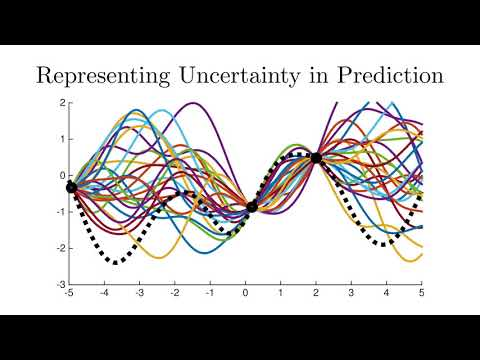

In [17]:
from IPython.display import YouTubeVideo

# 'b9a27XN_6tg' is the YouTube video ID
YouTubeVideo('oeyZNemZe04', width=600, height=400)

https://pixldata.com/blog/uncertainty-estimation-in-deep-learning/

## **Probabilistic Foundations 🎲**

<font color='blue'>`Beginner`</font>

In the world of probabilistic thinking and programming, we first need to build some **important foundations**.

In particular, we will need to understand what a **probability distribution** is, some simple but fundamental rules of probability, and how to interact with probabilities in code.

**Probability distributions** and **random variables** allow us to describe (and do calculations about) events with random outcomes. One example might be flipping a coin or rolling a die. In the first case, the possible outcomes are *heads* or *tails*.

### ***So what is a random variable?***

A **random variable** $X$ allows us to assign numerical values to the possible outcomes of a random event. For example, in the coin flipping example, we could use a binary random variable with $X = 1$ if the coin is heads and $X = 0$ for tails.

### ***What about a probability distribution?***

A **probability distribution** $p(X = x)$ describes the probability that $X$ takes each of its possible values $x$.

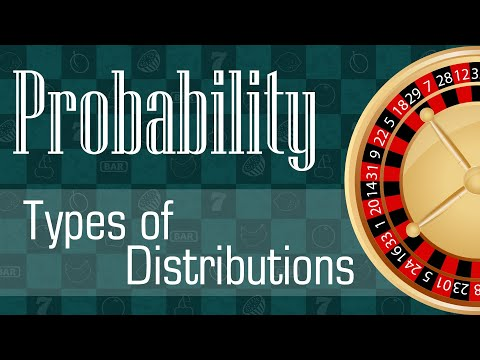

In [6]:
from IPython.display import YouTubeVideo

# 'b9a27XN_6tg' is the YouTube video ID
YouTubeVideo('b9a27XN_6tg', width=600, height=400)

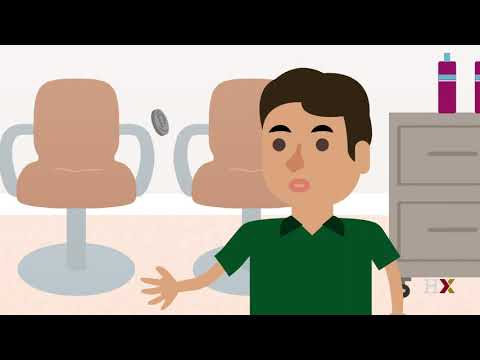

In [3]:
from IPython.display import YouTubeVideo

# 'ZoIPuTIPviY' is the YouTube video ID
YouTubeVideo('ZoIPuTIPviY', width=600, height=400)

### **🔧 Group Task (A1)**

*Find a friend and discuss ...* 🤝


*   Using the possible outcomes of rolling a die as a springboard, what are some other examples of random events?
*   What are their possible outcomes?
* What kind of distribution might be helpful to model these scenarios.

#### 💡 **Answer (A1)**

Assuming that a die has six sides, the outcomes are ⚀, ⚁, ⚂, ⚃, ⚄, and ⚅.

While there are many possible answers for what distribution could model this random event, here is one option:

$$
X = \begin{cases}
1 \text{ if } ⚀ \\
2 \text{ if } ⚁ \\
3 \text{ if } ⚂ \\
4 \text{ if } ⚃ \\
5 \text{ if } ⚄ \\
6 \text{ if } ⚅ \\
\end{cases}
$$

### **A Word on Notation...**

We will soon see a lot of new notation, so let's spend a little more time to make sure that everything is clear before moving on. If you are new to this topic or have seen some of it before but are confused by the way we've written things, then give this section a read.

**$X$ vs $x$**

* $X$ represents a random variable, that is, a variable that could take on several different values depending on the outcome of some random event.
* $x$ represents a particular value that $X$ could take. You can think of $x$ much like a python variable `x`, which at any time has a single value.
* One way of deciding whether to write $X$ or $x$ is to ask the question, "Is the value of the variable known?". If the answer is yes, then we write $x$. If the answer is no, then we write $X$.

**$p(X = x)$ vs $p(X)$ vs $p(x)$**

* $p(X)$ is a shorthand that means the same thing as $p(X = x)$, i.e., it represents the PMF/PDF of a random variable $X$.
* $p(x)$ has a slightly different meaning. It signifies the probability of the random variable $X$ taking the value $x$. Instead of representing the PDF, it represents the PDF evaluated at $x$. It is a probability *value* rather than a function.
* You might also see the notation $p_X(x)$, which has the same meaning as $p(x)$, but includes the random variable $X$ for clarity. If we write $p_X(1)$ we can still see that the random variable is $X$.


**$p$ vs $P$**

* Sometimes, you may see notation that uses both $p$ and $P$. In this case, $P$ and $p$ are being used to differentiate between distributions for *discrete* and *continuous* random variables, respectively.
* You may also see other notations such as $\text{Pr}$ or $\mathbb{P}$. These don't have any special meaning unless otherwise mentioned in the text where they appear.

### **The Bernoulli Distribution**

A Bernoulli distribution is used to describe random events with two possible outcomes e.g. when we have a random variable $X$ that takes on one of two values $x \in \{0, 1\}$:
\begin{align}
p(X = 1) &= p \\
p(X = 0) &= 1 - p
\end{align}
where $0 \le p \le 1$. Here $p$ is a parameter that controls the probability of each outcome. For example, in the case of a *fair* coin toss, $p = 0.5$ so that both outcomes have a 50\% chance of occurring. As we will see shortly, most distributions have multiple parameters.

A probability distribution can be uniquely defined by its probability mass function (PMF), or probability density function (PDF) in the case of continuous distributions. For the Bernoulli distribution, we write the PMF as
\begin{align}
p(X = x) = \text{Bernoulli}(X\mid p) &= \begin{cases}
p\, & \text{if } x = 1 \\
1 - p\, & \text{if } x = 0
\end{cases} \\
&= p^x(1-p)^{1-x}.
\end{align}

**Exercise:** convince yourself that the two definitions of the Bernoulli distribution shown above are equivalent.

Now let's construct a Bernoulli distribution in code so that we can play around with it and get some intuition.

**Note:** In this practical, we are going to use `numpyro` to construct our distributions. However, there are several other `jax` packages that work similarly (e.g., `distrax`) as well as several options for `tensorflow` (e.g., `tensorflow_probability`) and `pytorch` (e.g., `torch.distribution`). Don't worry too much about the specifics of how `numpyro` works, e.g., the names of the distributions and their arguments. Instead try to understand what the code is doing.

In [18]:
p = jnp.array(0.5)
bernoulli = dist.Bernoulli(probs=p)

Now that we have constructed the distribution we can get a sample from it:

In [19]:
sample = bernoulli.sample(key=rng)
print(sample)

1


And we can evaluate the probability of observing a sample.

**Note:** the distribution objects in `numpyro` (and indeed most other libraries for probability distributions) return *log*-probabilities rather than raw probabilities. This means that we need to take the exponent if we want to know the probability.

In [20]:
log_prob = bernoulli.log_prob(sample)
print(f"log p(X = {sample}) = {log_prob}")
print(f"p(X = {sample}) = {jnp.exp(log_prob)}")

log p(X = 1) = -0.6931471824645996
p(X = 1) = 0.5


As expected, we get a probability of 0.5.

We can also easily get **multiple samples**:

In [21]:
# { run: "auto" }
n = 5 #@param {type:"slider", min:1, max:10, step:1}
samples = bernoulli.sample(key=rng, sample_shape=(n,))
print(samples)

[1 0 0 0 1]


*But what if we wanted to evaluate the probability of observing all of our samples?*

The `bernoulli` object we created earlier treats each sample individually and returns the probabilities of observing each sample on its own:

In [22]:
individual_sample_probs = jnp.exp(bernoulli.log_prob(samples))
print(individual_sample_probs)

[0.5 0.5 0.5 0.5 0.5]


But, we can use one of the laws of probability to compute the probability of observing all of the samples together:
$$
p(X_1=x_1, X_2=x_2, \dots, X_N=x_n) = \prod_{n=1}^N p(X_n=x_n).
$$
This is called the *product rule of probability*, and it says that for *independent* random variables, the joint probability (i.e., the probability of observing them all together) is equal to the product of the individual probabilities.

Now, let's calculate the joint probability of our samples.

In [23]:
joint_prob = jnp.prod(individual_sample_probs)
print(joint_prob)

0.03125


### **🔧 Group Task (A2)**

* Why do you think that libraries usually return *log*-probabilities?
* Play with the following slider. How does changing parameter $p$ affect the Bernoulli distribution?

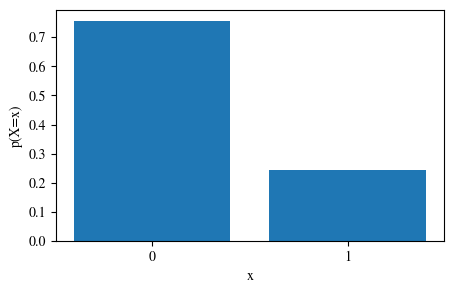

In [24]:
# Bernoulli distribution interactive excercise { run: "auto" }

p = 0.26 #@param {type:"slider", min:0, max:1, step:0.01}

n = 1000
bernoulli_ = dist.Bernoulli(probs=p)
samples = bernoulli_.sample(key=rng, sample_shape=(n,))

num_ones = (samples == 1.).sum()
num_zeros = (samples == 0.).sum()

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar([0, 1], [num_zeros/n, num_ones/n])
ax.set_xticks([0, 1])
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
plt.show()

#### 💡 **Answer (A2)**


The answer, as is often the case, is numerical stability! When working with numbers between 0 and 1 (i.e., probabilities), it is easy to run into *underflow*. Underflow is when a number that is very close to zero gets rounded to become *exactly* zero because the amount of memory used to represent it is not enough to maintain accuracy.

For example, consider computing the probability of several independent events $A$, $B$, $C$, $\ldots$:
$$
p(A, B, C, \ldots) = p(A) \times p(B) \times p(C) \times \ldots,
$$
because we are multiplying numbers that are between 0 and 1, we know that the result will be smaller for each multiplication. As we perform more and more multiplications, it becomes more likely that the computation will underflow and erroneously produce a result of 0.

We can avoid this problem by instead working with log-probabilities. Continuing the above example, we get
$$
\log p(A, B, C, \ldots) = \log p(A) + \log p(B) + \log p(C) + \ldots,
$$
where by the log laws, we have replaced all of the multiplications with additions, thereby avoiding any numerical issues. This is because numbers that are very close to zero become large negative numbers when you apply the log function. e.g. $\log_{10}(0.0000001) = -16.1181$. Adding these larger log probabilities (= multiplying probabilities) will preserve accuracy for longer and so avoids the risk we will accidentally round the corresponding probabilities to zero.

### **The Categorical Distribution**

A categorical distribution is used to model random events with multiple *discrete* outcomes, such as the die-rolling event from above. By discrete, we mean that there is a finite number of outcomes. We will tackle continuous outcomes – e.g., a value like temperature that is modeled by a real numbers – shortly.

As with the Bernoulli distribution, we can characterise the categorical distribution with its PMF:
\begin{align}
p(X = x) = \text{categorical}(X\mid\mathbf{p}) = \prod_{k=1}^K p_k^{[x=k]},
\end{align}
where $K$ is the number of outcomes, $\textbf{p} = [p_1, p_2, \dots, p_K]$, $p_k$ is the probability of the $k$th outcome, $\sum_k p_k = 1$, and $[x = k]$ is called an Iverson bracket which evaluates to 1 if $x = k$ and 0 otherwise.

**Try this out:** Convince yourself that a categorical distribution with $K = 2$ is equivalent to a Bernoulli distribution.

Now, let's start playing with this distribution in code!

In [25]:
ps = jnp.array([0.1, 0.2, 0.3, 0.4])
categorical = dist.Categorical(probs=ps)

As before we can take some samples:

In [26]:
samples = categorical.sample(key=rng, sample_shape=(10,))
print(samples)

[2 3 3 2 2 2 0 3 3 3]


And compute the probability for each of the random events:

In [27]:
print(f"p(X=0) = {jnp.exp(categorical.log_prob(0)):.1f}")
print(f"p(X=1) = {jnp.exp(categorical.log_prob(1)):.1f}")
print(f"p(X=2) = {jnp.exp(categorical.log_prob(2)):.1f}")
print(f"p(X=3) = {jnp.exp(categorical.log_prob(3)):.1f}")

p(X=0) = 0.1
p(X=1) = 0.2
p(X=2) = 0.3
p(X=3) = 0.4


### 🔧 **Group Task (A3)**

Play with the following sliders, which control the parameters of the categorical distribution. Note that because $\sum_k p_k = 1$, we are using an alternative way to represent the categorical distribution. Instead of specifying the probabilities $p_k$, we specify logits $l_k$. Each $p_k$ is then computed as
$$
p_k = \frac{\exp(l_k)}{\sum_{k'}\exp(l_k)},
$$
i.e., using the softmax function.

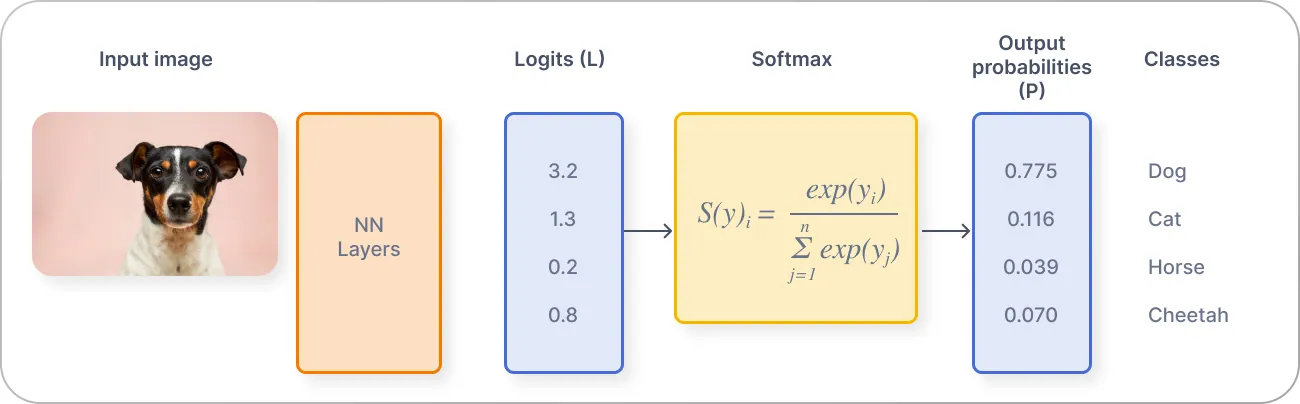

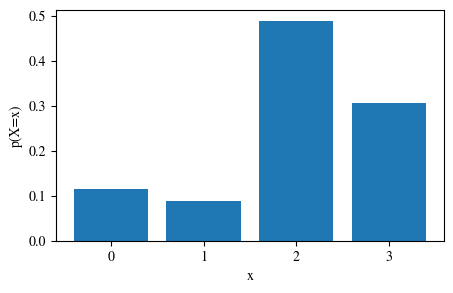

In [30]:
# Categorical distribution interactive excercise {run: "auto"}
l_0 = 0.7 #@param {type:"slider", max:4, step:0.1}
l_1 = 0.3 #@param {type:"slider", max:4, step:0.1}
l_2 = 2 #@param {type:"slider", max:4, step:0.1}
l_3 = 1.6 #@param {type:"slider", max:4, step:0.1}

logits = jnp.array([l_0, l_1, l_2, l_3], dtype=jnp.float32)
categorical = dist.Categorical(logits=logits)
samples = categorical.sample(key=rng, sample_shape=(1000,))

values =[0, 1, 2, 3]
hist, _ = jnp.histogram(
    samples, bins=jnp.array(values + [4]), density=True
)

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(values, hist)
ax.set_xticks(values)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
plt.show()

## ⭐ **Continuous Distributions**

So far, we have considered categorical distributions as a way to model random events with a finite number of possible outcomes. However, many real-world probabilistic questions consider events with an uncountable number of outcomes.

Consider the following application areas and the random variables they might model:

* **Climate modelling**: Temperature, atmospheric pressure, other barometric variables.
* **Population studies**: Demographic information (height, weight, etc.)
* **Finance and Economics:** Stock prices, interest rates, market indices.
* **Engineering:** Material strength, failure times of components, signal noise.
* **Medicine and Health Sciences:** Blood pressure, cholesterol levels, survival times.

You've likely already noticed that these values all fall along the continuous number spectrum. Random variables like these are called *continuous random variables**, and are best modelled using **continuous distributions**. Let's have a look at some of them!

### **The (Continuous) Uniform Distribution**

Let's have a look at arguably one of the most straightforward continuous distributions: the uniform distribution. Under this distribution, all possible values are equally likely.

The uniform distribution has the following form
$$
p(X = x) = \mathrm{Uniform}(x\mid a, b) = \begin{cases}
\frac{1}{b - a}\, & \text{if } a \le x \le b \\
0\, & \text{otherwise},
\end{cases}
$$
where $a$ and $b$ are the upper and lower bound parameters, respectively.

As has been our custom, here is an interactive plot of the distribution if you'd like to get a better picture.

C:\Users\dell\AppData\Local\Temp\ipykernel_15848\2137476207.py:11: UserWarning: Out-of-support values provided to log prob method. The value argument should be within the support.
  ax.plot(xs, jnp.exp(uniform.log_prob(xs)), color='C0', lw=3, alpha=0.5)


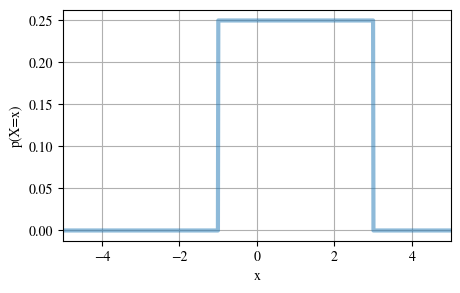

In [31]:
# Plotting the (continuous) uniform distribution {run: "auto"}
#@markdown Note: `a` must be smaller than `b`.
a = -1 #@param {type:"slider", min:-5, max:5, step:0.1}
b = 3 #@param {type:"slider", min:-5, max:5, step:0.1}

uniform = dist.Uniform(low=a, high=b)
xs = jnp.linspace(-5, 5, 1000)

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, jnp.exp(uniform.log_prob(xs)), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
ax.grid(0.3)
ax.set_xlim(-5, 5)
plt.show()

### **The Normal Distribution**

The normal – also known as Gaussian – distribution is one of the most common distributions for modeling *continuous* random variables. Its probability density function is
$$
p(X = x) = \mathcal{N}(x\mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(\mu - x)^2}{2\sigma^2}\right),
$$
where $\mu$ and $\sigma$ are the *mean* and *standard deviation* (also called the location, and scale or square-root of the *variance* $\sigma^2$, respectively).

Once again, the best way to get a sense for this distribution is to play with some code!

#### 🔧 **Group Task (A4)**

* Play with the following sliders. How do the mean and standard deviation affect the samples?

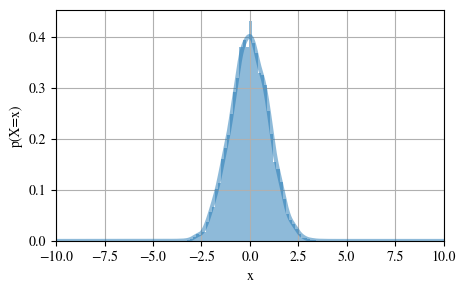

In [32]:
# Normal distribution interactive excercise {run: "auto"}
μ = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
σ = 1 #@param {type:"slider", max:4, step:0.1}

normal = dist.Normal(loc=μ, scale=σ)
samples = normal.sample(key=rng, sample_shape=(10000,))

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.hist(samples, bins=50, density=True, alpha=0.5)
x = jnp.linspace(-10, 10, 3000)
kde = gaussian_kde(samples)
ax.plot(x, kde(x), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
ax.set_xlim(-10, 10)
ax.grid(0.3)
plt.show()


##### 💡 **Answer (A4)**
The mean controls where the center of the distribution is located. In other words, it controls where the most likely *location* to sample a value is.

The standard deviation controls how wide the distribution is. In other words, it controls how likely we are to draw samples farther away from the mean.

#### 🤖 **Code Task 1**

* Fill in the code below to define a PDF for the normal distribution, using functions from `jax`.

 *Hint:* You may want to use `jnp.pi`, `jnp.sqrt`, and `jnp.exp`.

In [33]:
# Code Task (1): Implementing the normal PDF from scratch!
def normal_pdf(loc, scale, x):
   # p_x =  # TODO: your code goes here!
    return p_x

##### ☑️ **Test your code**

In [35]:
def test_normal_pdf(pdf_fn):
  assert pdf_fn(0, 1, 0) == jnp.exp(dist.Normal(loc=0, scale=1).log_prob(0)), "Normal(X=0|0, 1) is incorrect."
  assert pdf_fn(0, 2, 0) == jnp.exp(dist.Normal(loc=0, scale=2).log_prob(0)), "Normal(X=0|0, 2) is incorrect."
  assert pdf_fn(0, 1, 1) == jnp.exp(dist.Normal(loc=0, scale=1).log_prob(1)), "Normal(X=0|1, 1) is incorrect."
  assert pdf_fn(2, 3, 1) == jnp.exp(dist.Normal(loc=2, scale=3).log_prob(1)), "Normal(X=1|2, 3) is incorrect."
  print("Nice! Your answer looks correct.")

test_normal_pdf(normal_pdf)

Nice! Your answer looks correct.


##### 💡 **Answer (Code Task 1)**

In [36]:
def normal_pdf(loc, scale, x):
    p_x = 1 / jnp.sqrt(2 * jnp.pi * scale**2)
    p_x *= jnp.exp(-((loc - x)**2) / (2 * scale**2))

    return p_x

test_normal_pdf(normal_pdf)

Nice! Your answer looks correct.


### **Expected Values**

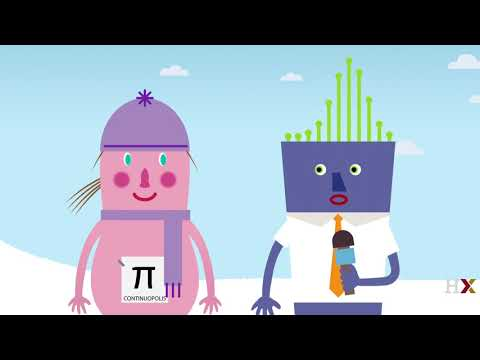

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('sheoa3TrcCI', width=600, height=400)


The expected value of a random variable is the value that we expect to get on average when we sample a large number of different outcomes from the random event.

For example, if we consider our example of flipping a coin from above, where $X = 1$ if the coin lands on heads and $X = 0$ if the coin lands on tails, then intuitively the expected value is $0.5$. To see this, think about a game where you get 1 coin for heads and no coins for tails. If you play a thousand games, you should expect to get about $500$ coins in total. So your expected profit from a single match is $500/1000 = 0.5$ coins.

More precisely, we can write the expected value as
$$
\mathbb{E}[X] = \sum_x x \cdot p(X=x),
$$
for a discrete random variable $X$ or
$$
\mathbb{E}[X] = \int x \cdot p(X=x) \mathrm{d}x,
$$
for a continuous random variable. From this definition, we can think of the expected value as a weighted average of all of the values of $X$, where the weighting for each value is the probability of observing it.

**$E$ vs $\mathrm{E}$ vs $\mathbb{E}$**

* You may also have seen a variety of notations for expected values ($E$, $\mathrm{E}$, $\mathbb{E}$) and variances ($V$, $\mathrm{V}$, $\mathbb{V}$, $\text{Var}$). Don't worry, all of these share the exact same meaning.

We can also calculate expected values of functions that take random variables as inputs. For example, the variance of a random variable can be calculated using the following expected value
$$
\mathbb{V}[X] = \mathbb{E}[(X - \mu)^2],
$$
where $\mu = \mathbb{E}[X]$ is the mean, as described above.

#### 🔧 **Group Task (A5)**

* Can you compute the expected value for rolling a six-sided die?

##### 💡 **Answer (A5)**

Assuming that we use the following random variable to represent our die throw
$$
X = \begin{cases}
1 \text{ if } ⚀ \\
2 \text{ if } ⚁ \\
3 \text{ if } ⚂ \\
4 \text{ if } ⚃ \\
5 \text{ if } ⚄ \\
6 \text{ if } ⚅ \\
\end{cases}
$$
the expected value is
$$
\mathbb{E}[X] = \frac{1}{6} \cdot 1 + \frac{1}{6} \cdot 2 + \frac{1}{6} \cdot 3 + \frac{1}{6} \cdot 4 + \frac{1}{6} \cdot 5 + \frac{1}{6} \cdot 6 = 3.5.
$$

### **Computing Expected Values: Monte Carlo Estimation**

Instead of computing an expected value exactly, we can estimate it using a *Monte Carlo* approximation.  We can describe this procedure using the following mathematical notation:
$$
\mathbb{E}[X] \approx \frac{1}{N} \sum_{n=1}^{N} x_n\,, \quad x_n \sim p(X).
$$
That is, we sample $N$ values $x_n$ from $p(X)$ and then take the average. Because the values appear proportionally to their probabilities, the larger $N$, the more accurate the estimation will become.

We can also implement this in code, and calculate the expected value of the normal distribution $\mathcal{N}(x \mid \mu, \sigma)$.


#### 🔧 **Group Task (A6)**

Play with the sliders...

* Start with a large value for $N$ and a small value for $\sigma$, what number does the expected value approximate? *Hint:* change the value of $\mu$ and see what happens to the expected value.
* Now, start decreasing $N$ and/or increasing $\sigma$. What happens to the expected value?
* What notation in the equation above do lines 7 and 9 in the code below correspond to?


In [37]:
# Expected value interactive excercise {run: "auto"}
N = 100 #@param {type:"slider", min:1, max:400, step:1}
μ = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
σ = 1 #@param {type:"slider", min: 0.1, max:4, step:0.1}

normal = dist.Normal(loc=μ, scale=σ)
samples = normal.sample(key=rng, sample_shape=(N,))

expected_value = jnp.sum(samples) / N

print(f'E[X] = {expected_value:.5f}')

E[X] = 0.02840


##### 💡 **Answer (A6)**


1. The expected value for a random variable with a normal distribution is the mean parameter $\mu$. For this reason the term *mean* is often used synonymously with *expected value*.
2. As we decrease $N$ and/or increase $\sigma$, the Monte Carlo approximation becomes less accurate. **Fun fact**: for a standard Monte Carlo approximator such as this, the approximation error decreases at a rate of $\sqrt{N}$. In other words, if we multiply $N$ by 4, the error in the approximation should be divided by 2.

### **The Beta Distribution**

The final distribution on our *grand tour of (continuous) probability distributions* (for now) is the beta distribution. We're taking a look at this for two reasons.

First, we just want to take a look at a continuous probability distribution that *isn't* normal for the sake of getting some new perspective. Second, this distribution will be useful later in the practical – so if you aren't already familiar with it, stick around for this section.

The beta distribution is helpful for describing a continuous random variable between 0 and 1, such as percentages and ratios.

It has the following form
$$
p(X = x) = \mathrm{Beta}(x|\alpha,\beta) = \frac{1}{\mathrm{B}(\alpha,\beta)}x^{\alpha-1}(1 - x)^{\beta - 1},
$$
where $\alpha > 0$ and $\beta > 0$ are the two *shape* parameters of the distribution, and $\mathrm{Beta}$ is called the beta function. Don't worry about the exact form of the beta function, all you need to know is that we can easily compute it using `numpy` or similar libraries, and it just ensures that the probability distribution is normalised – that is, that the total probability of all of the events adds up to 1. Instead, let's play around with the following sliders to get an idea of what the beta distribution looks like.
* Try making each parameter big or small while leaving the other at the same value.
* Then try make them both big or small.

We're just trying to get a feel for the kinds of behavior the beta distribution can describe, and how it is different from the normal distribution. Later on we'll use the beta distribution in an example, which will help us get some further intuition for this distribution.

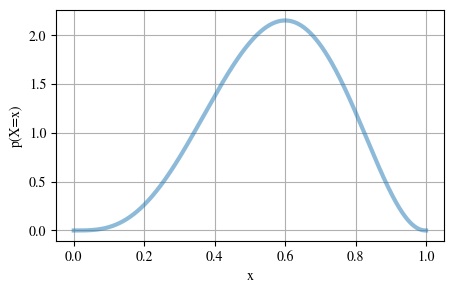

In [38]:
# beta distribution interactive excercise {run: "auto"}
α = 4.3 #@param {type:"slider", min:0.1, max:10, step:0.1}
β = 3.2 #@param {type:"slider", min:0.1, max:10, step:0.1}

beta = dist.Beta(α, β)
xs = jnp.linspace(0, 1, 1000)

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, jnp.exp(beta.log_prob(xs)), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
ax.grid(0.3)
plt.show()

## ⭐ **Multivariate Distributions**

Now that we understand a bit more about continuous distributions and their expected values, let's consider a more complex problem.

What if we want to describe and model the behaviour of *multiple* random variables? We might find that certain outcomes depend on this!

In this case, it would be very helpful to capture each random variable's behaviour, as well as how it interacts with other random variables (i.e. the relationships between then).

**Multivariate distributions** help us to model multiple random variables simultaneously, and better understand their underlying processes.

In this section, we'll have a look at some particular distributions to help us model such RVs, as well as some important concepts about RV interdependence.

*Note: some of the mathematics (involving matrix algebra) in this section is slightly more complicated and may be closer to an <font color='orange'>`Intermediate`</font> level. If you are struggling with the matrices, don't worry! We also present the special two-dimensional case, which doesn't require any matrices. The important takeaways here are not the mathematics but rather the concepts and intuitions, which are still <font color='blue'>`Beginner`</font>-friendly.* 🙌

### **The Multivariate Normal Distribution**
The multivariate normal distribution generalises the normal distribution to allow us to consider multiple random variables, where the outcomes of these multiple random variables take on a *jointly normal distribution*.

In other words, we can now model variables that are not independent: if we know the value of one variable, that tells us something about the other variables!

More concretely, the multivariate normal distribution lets us consider multiple random variables such that when we condition on some of these variables the remaining variables have a normal distribution (don't worry if you don't know what "condition on" means yet; we'll discuss it shortly).

These variables are distributed in a kind of stretched fuzzy ball in higher dimensional space.

### **Relationships between Variables**
As a rule of thumb, the more one variable tells us about another, the larger the *covariance* or *correlation* between the two. Enough text, let's take a look at the equations, which will hopefully give some further insight. First, let's look at the general PDF for an $D$-dimensional random variable $\mathbf{X}$:
$$
p(\mathbf{X} = \mathbf{x}) = \mathcal{N}(\mathbf{x}\mid \boldsymbol{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^D|\Sigma|}}\exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^\intercal\Sigma^{-1}(\mathbf{x} - \boldsymbol{\mu})\right),
$$
where $\mathbf{x}$ and $\boldsymbol{\mu}$ are now vectors of numbers rather than single numbers, $\Sigma$ is a *covariance matrix* that replaces $\sigma$ from our univariate definition above, and $|\Sigma|$ is its determinant. The covariance matrix looks like this:
$$
\Sigma = \left[\matrix{
    \sigma_1^2 & \rho_{12} \sigma_1 \sigma_2 & \cdots &  \rho_{1D} \sigma_1 \sigma_D  \\
    \rho_{21} \sigma_2\sigma_1 & \sigma_2^2 & \cdots &  \rho_{2D} \sigma_2 \sigma_D \\
    \vdots & \vdots & \ddots & \vdots \\
    \rho_{D1} \sigma_D \sigma_1 & \rho_{D2} \sigma_D \sigma_2 & \cdots & \sigma_D^2}\right],
$$
where $\sigma_i^2$ is the variance for the $i$th dimension, and $\rho_{ij} = \rho_{ji}$ is the *correlation* between the $i$th and $j$th dimensions. The covariance matrix tells us how the "ball" of random variables is stretched and rotated in space.\\

**Try this out**: Play around with the parameters of this multivariate normal distribution.

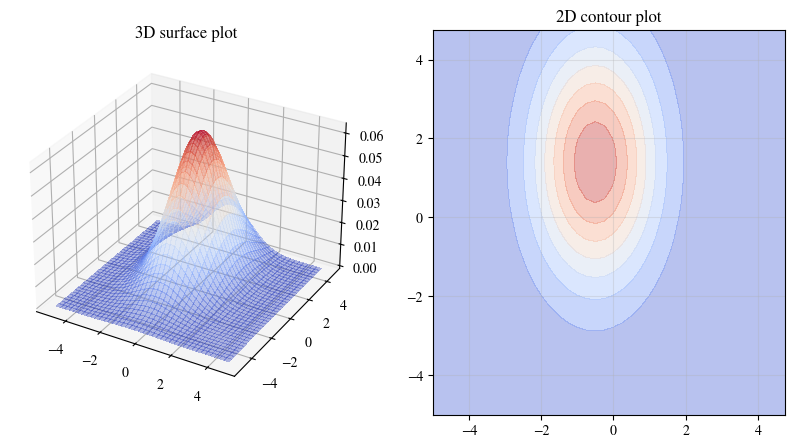

In [39]:
# Multivariate normal interactive excercise 1 {run: "auto"}

#@markdown Both plots below show the same 2D normal distribution. Each plot is useful for visualizing the distribution in different ways.

#@markdown The plot on the left helps us visualise the probability values for each $(x_1, x_2)$ pair.

#@markdown The plot on the right helps us visualise the shape of the distribution from above. Note that the colors represent the same probabilities as the left-hand plot. Each ring shows pairs of equal probability.

from matplotlib import gridspec
from scipy.stats import norm

μ1 = -0.5 #@param {type:"slider", min:-5, max:5, step:0.1}
σ1 = 1.2 #@param {type:"slider", min: 0.1, max:4, step:0.1}
μ2 = 1.4 #@param {type:"slider", min:-5, max:5, step:0.1}
σ2 = 2.1 #@param {type:"slider", min: 0.1, max:4, step:0.1}
ρ = 0 #@param {type:"slider", min: -1, max:1, step:0.1}

μ = jnp.array([μ1, μ2])
Σ = jnp.array([[σ1**2, ρ*σ1*σ2],[ρ*σ2*σ1, σ2**2]])

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')

X1 = jnp.arange(-5, 5, 0.25)
X2 = jnp.arange(-5, 5, 0.25)
X1, X2 = jnp.meshgrid(X1, X2)
Xs = jnp.concatenate(
    [X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1
)
Z = jax.vmap(
    lambda x: jnp.exp(dist.MultivariateNormal(μ, Σ).log_prob(x))
)(Xs).reshape(X1.shape)

from matplotlib import cm
ax1.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                linewidth=0, alpha=0.4, antialiased=False)
ax1.set_title('3D surface plot')


ax2 = fig.add_subplot(122)
ax2.contourf(X1, X2, Z, cmap=cm.coolwarm,
            alpha=0.4, antialiased=False)
ax2.set_title('2D contour plot')


ax2.grid(alpha=0.3)
plt.show()

### **The Sum and Product Rules**

Now that we've introduced a multivariate distribution, we can use it to explore two important concepts when working with probability distributions: marginal and conditional distributions. This will lead us to two important rules of probability that we'll need later in the practical (and life): the sum and product rules.

Remember that formally, **joint probabilities** tell us the probability of two or more events for random variables occurring. For two variables, we write $P(A=a,B=b)$. This isn't new - you just saw joint probabilities in action for the multivariate normal distribution! 🤔

#### **Marginal Distributions & the Sum Rule**


Let's consider $p(X_1, X_2)$ a *joint* distribution over two random variables $X_1$ and $X_2$. Now, what if we only cared about one of the random variables e.g., $X_1$? We can use the *sum* rule to *marginalise* away $X_2$ from the joint distribution to give us the *marginal* distribution $p(X_1)$. Concretely, for a discrete $X_2$, the sum rule can be written as
$$
p(X_1 = x_1) = \sum_{x_2} p(X_1 = x_1, X_2 = x_2).
$$
Similarly, for a continuous $X_2$ we'd have
$$
p(X_1 = x_1) = \int p(X_1 = x_1, X_2 = x_2)\, \mathrm{d}x_2.
$$
This rule tells us that if we want a marginal distribution, we just need to enumerate all of the values of the variables that we don't want and sum the resulting distributions.

What if we have three (or more) random variables? Nothing special, which ever variables we don't want to keep in our marginal distribution, we sum over, for example
$$
p(X_1 = x_1, X_3 = x_3) = \sum_{x_2} \sum_{x_4} p(X_1 = x_1, X_2 = x_2, X_3 = x_3, X_4 = x_4).
$$

For a multivariate normal distribution, the sum rule has a very simple and clear form, which will hopefully make things more clear. Specifically, if
$$p(X_1, X_2) = \mathcal{N}\left(\left[\matrix{x_1 \\ x_2}\right]\middle| \left[\matrix{\mu_1 \\ \mu_2}\right], \left[\matrix{\sigma_1^2 & \rho \sigma_1 \sigma_2 \\ \rho \sigma_1 \sigma_2  &\sigma_2^2}\right]\right),$$
as defined above, then
$$
p(X_1) = \mathcal{N}\left(x_1 \mid \mu_1, \sigma_1\right).
$$
In other words, we simply 'drop' the variables that we don't care about, and get another normal distribution with only the ones that we do care about!

*Note:* some keen-eyed readers may have noticed something slightly strange... in the joint distribution formula all of the $σ$s on the diagonal are squared, whereas in the marginal formal we just write $\sigma$ without the square. That is simply a convention, you can also write $\mathcal{N}\left(x_1 \mid \mu_1, \sigma_1^2\right)$, the meaning is the same.

Another way of expressing marginals, is that when we sum or integrate over all of the possibilities for one variable in a joint probability, we can get the probability distribution of the other! You can intuit the name by thinking of integrating or summing towards the $A$ or $B$ variable axis.


#### 🔧 **Group Task (A7)**

* How might we visualise marginalisation on a Venn diagram?

##### 💡 **Answer (A7)**


Marginal distributions are just the complete circles for each event, ignoring overlaps - here $P(A)$ and $P(B)$!

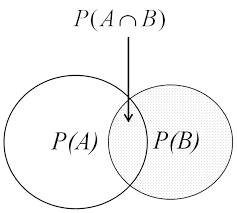

#### **Conditional Distributions & the Product Rule**

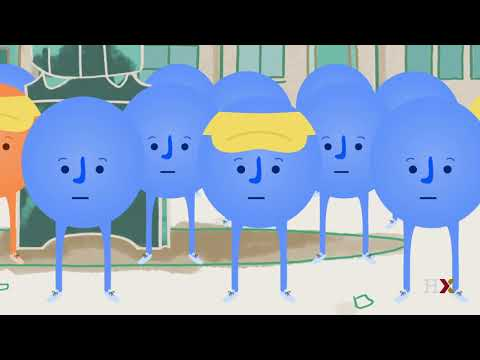

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('by3_weGwnMg', width=600, height=400)



As we mentioned above, we use *joint* distributions when one random variable tells us something about another random variable. But how do we actually use that information? For example, if $X_2 = 2$, how does that change the distribution over $X_1$? That is exactly what *conditional* distributions tell us. To be concrete the *conditional* distribution of $X_1$ given $X_2$ can be calculated as
$$
p(X_1 = x_1|X_2 = x_2) = \frac{p(X_1 = x_1, X_2 = x_2)}{p(X_2 = x_2)},
$$
in other words, it is the ratio of the *joint* distribution and the *marginal* distribution of the conditioning variable. Rearranging the above formula, we can now write down a formula for a *join* distribution in the case where the variables *are not* independent
$$
p(X_1 = x_1, X_2 = x_2) = p(X_1 = x_1|X_2 = x_2)p(X_2 = x_2).
$$
What $X_1$ and $X_2$ *are* independent? Then
$$
p(X_1 = x_1|X_2 = x_2) = p(X_1 = x_1),
$$
and then we can write the joint as
$$
p(X_1 = x_1, X_2 = x_2) = p(X_1 = x_1)p(X_2 = x_2),
$$
which recovers the formula we used in group task 3!

As above, for more than two variables, things are still simple
$$
p(X_1 = x_1, X_3 = x_3|X_2 = x_2, X_4 = x_4) = \frac{p(X_1 = x_1, X_2 = x_2, X_3 = x_3, X_4 = x_4)}{p(X_2 = x_2, X_4 = x_4)}
$$
or equivalently
$$
p(X_1 = x_1, X_2 = x_2, X_3 = x_3, X_4 = x_4) = p(X_1 = x_1, X_3 = x_3|X_2 = x_2, X_4 = x_4)p(X_2 = x_2, X_4 = x_4).
$$

And also like above, for the 2-dimensional normal we get some simple equations which can help us understand what is going on when we work with conditional distributions.
$$
p(X_1=x_1|X_2=x_2) = \mathcal{N}\left(x_1\mid \mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2 - \mu_2), (1 - \rho^2)\sigma_1^2\right).
$$

**Relating the joint, marginal and conditional probability:**

These quantities are related via: $p(A,B) = p(A \mid B) p(B) = p(B \mid A) p(A)$.

**A Word on Notation:**

**$p(A \cap B)$ vs $p(A , B)$**

* These are equivalent notations for the joint distribution. That is, the probability of event $A$ happening and event $B$ happening.

**What is the '$\mid$' in $p(X\mid a, b, c)$?**

* The bar we often see in the middle of probability distribution notation is used to separate the random variables of the distribution from the variables that the random variables are conditioned on.
* In other words, we have a function with two different kinds of inputs. The inputs on the right of $|$ are conditioning variables. The inputs on the left of $|$ are the values of the random variables under the probability distribution. The output of the function is the probability of the values of these random variables.
* We read $p(A \mid B, C)$ as 'the probability of A *given* B and C'.

#### 🔧 **Group Task (A8)**

* Is it possible to show how a conditional probability $p(A \mid B)$ would look on a Venn diagram? What about the joint?

* Can you see using your Venn diagram that the above statement about joint probabilities is true? What is $p(A\mid B)$ when $A$ and $B$ are independent events (i.e., no overlap on a Venn diagram)?


---


 Let's now try to understand the equations for the sum and product rules by considering the 2-dimensional normal setting. Discuss the following questions with your neighbors. If the answers don't seem obvious to you, don't worry! As usual, we have some code to play with to help our understanding, so feel free to use any combination of mathematics and playing with sliders to help you understand.

* If $\rho = 0$, what happens to the conditional distributions?
* If $\rho \rightarrow 1$, what happens to the conditional distributions? (*Hint:* with a large $\rho$, try setting the standard deviations to 1 and then set mean values to 0 and then slowly increasing or decreasing them).
* How do the standard deviations (and their ratio) impact the conditional distributions (for any value of $\rho$)?
* How does the value of $\rho$ impact the marginal distributions?

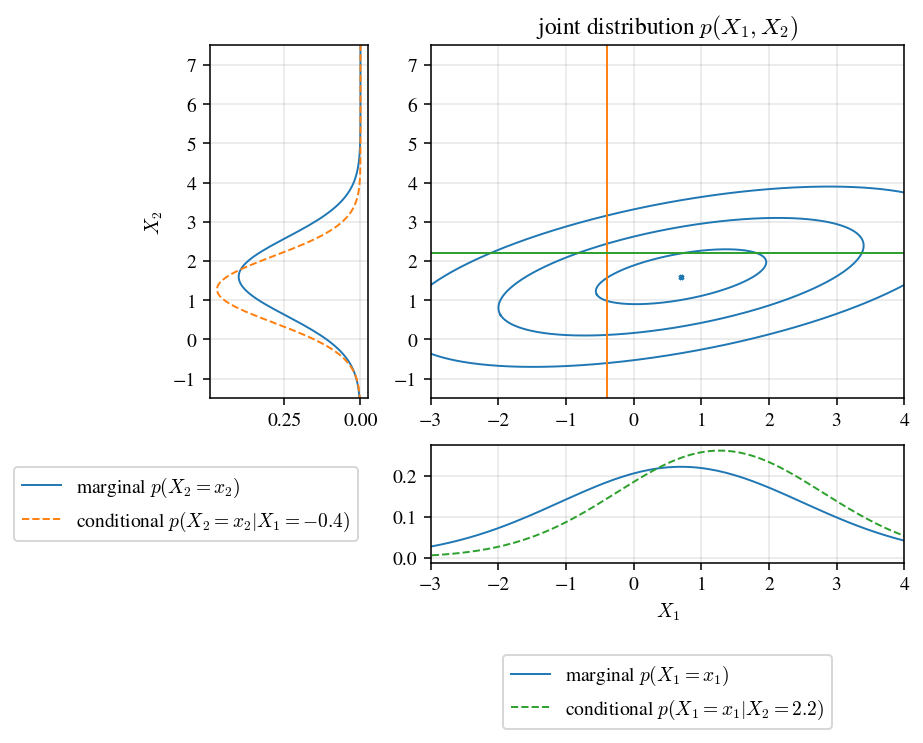

In [40]:
# Multivariate normal interactive excercise 2 {run: "auto"}

from matplotlib import gridspec
from scipy.stats import norm

μ1 = 0.7 #@param {type:"slider", min:-5, max:5, step:0.1}
σ1 = 1.8 #@param {type:"slider", min: 0.1, max:4, step:0.1}
μ2 = 1.6 #@param {type:"slider", min:-5, max:5, step:0.1}
σ2 = 1 #@param {type:"slider", min: 0.1, max:4, step:0.1}
ρ = 0.529 #@param {type:"slider", min: -0.999, max:0.999, step:0.001}
x1 = -0.4 #@param {type:"slider", min:-5, max:5, step:0.1}
x2 = 2.2 #@param {type:"slider", min:-5, max:5, step:0.1}

μ = jnp.array([μ1, μ2])
Σ = jnp.array([[σ1**2, ρ*σ1*σ2],[ρ*σ2*σ1, σ2**2]])

cond_μ_x1, cond_σ_x1 = Gaussian_conditional(μ, Σ, x=None, y=x2)
cond_μ_x2, cond_σ_x2 = Gaussian_conditional(μ, Σ, x=x1, y=None)

xrange = jnp.linspace(-10, 10, 300)
density_x1 = norm.pdf(xrange, μ1, σ1)
density_x2 = norm.pdf(xrange, μ2, σ2)

cond_density_x1 = norm.pdf(xrange, cond_μ_x1, cond_σ_x1)
cond_density_x2 = norm.pdf(xrange, cond_μ_x2, cond_σ_x2)

plt.figure(dpi=140)
gs = gridspec.GridSpec(2, 2, width_ratios=[1,3], height_ratios=[3,1])
ax = plt.subplot(gs[0,1])
axl = plt.subplot(gs[0,0], sharey=ax)
axb = plt.subplot(gs[1,1], sharex=ax)

plot_log_gaussian_ellipse(ax, μ, Σ, color='C0', alpha=1, lw=1, label=None, MAP_size=5, std_levels=[0.7, 1.5, 2.3])
ax.set_title('joint distribution $p(X_1, X_2)$')
ax.axvline(x1, lw=1, c='C1')
ax.axhline(x2, lw=1, c='C2')

axb.plot(xrange, density_x1, c='C0', lw=1, label='marginal $p(X_1=x_1)$')
axb.plot(xrange, cond_density_x1, '--', c='C2', lw=1, label=f'conditional $p(X_1=x_1 | X_2={x2})$')
axb.set_xlabel('$X_1$')
axb.set_xlim([-3,4])
axb.legend(bbox_to_anchor=[0.5, -1.1],
           loc='center')

axl.plot(density_x2, xrange, c='C0', lw=1, label='marginal $p(X_2 = x_2)$')
axl.plot(cond_density_x2, xrange, '--', c='C1', lw=1, label=f'conditional $p(X_2 = x_2 | X_1={x1})$')
axl.set_ylabel('$X_2$')
axl.set_ylim([-1.5,7.5])
axl.invert_xaxis()
axl.legend(bbox_to_anchor=[-0.15, -0.3],
           loc='center')

ax.grid(alpha=0.3)
axl.grid(alpha=0.3)
axb.grid(alpha=0.3)
plt.show()


##### 💡 **Answer (A8)**

We can show the joint, but the conditional also takes into account what happened to B - it compares the bit of the chart where both events happened to the bit where B happened.

Conditional probability of A given B:

$$p(A \mid B)=\frac{p(A \cap B)}{p(B)}.$$

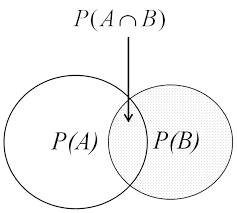


$p(A \mid B)$ - probability of event A given B has occurred<br>
$p(A \cap B)$ - probability that event A and B occurred (the joint, $p(A,B)$)

---

1. If $\rho = 0$, the conditional distributions match the marginal distributions, since conditioning on an independent variable has no effect.
2. As $\rho \rightarrow 1$, the value of the conditional distribution becomes more and more influenced by the value of the conditioning variable. If both means are 0, and both standard deviations are 1, then the conditional distribution converges to the values of the conditioning variable.
3. The smaller the ratio, i.e., the less (relatively) confident we are about the conditioning variable, the less the conditioning variable affects the conditional distribution.
4. $\rho$ does not affect the marginal distributions.

## 🤖 **`Numpyro`: Batch and Event Shapes**

Let's take a moment to play with some code for both the multivariate normal and its simpler friend, the univariate normal. We'll take this opportunity to learn something about how `numpyro` (and most other packages for working with probability distributions) handle batches of data – something we'll have to understand for training machine learning models!

All distributions in `numpyro` have an `event_shape` – which describes how my dimensions the random variable is, e.g., for a 2-dimensional normal distribution this would be 2 – and a `batch_shape` which describes how many sets of parameters the distribution has – it is probably easier to show what this means with the following examples rather than tell.

Let's first look at a simple univariate normal $\mathcal{N}(x|0, 1)$, as we've seen before in this practical. We will evaluate the probabilities of $X = 1$ and $X = 2$:

In [41]:
values = jnp.array([1., 2.])
normal = dist.Normal(0., 1.)
print(f"event_shape = {normal.event_shape}")
print(f"batch_shape = {normal.batch_shape}")
print(f"p(X = {values}) = {jnp.exp(normal.log_prob(values))}")

event_shape = ()
batch_shape = ()
p(X = [1. 2.]) = [0.24197073 0.05399096]


We see that this distribution has an empty event shape, which you can think of as being the same as an event shape of 1 (like how a scalar is the same as a vector of length 1). The batch shape is also empty, since we only specified one set of parameters ($\mu = 0, \sigma = 1$).  

Now since we tried to evaluate the probability of two values at once, and neither the event shape nor the batch shape are 2, this is equivalent to calling `dist.log_prob(1.)` and `dist.log_prob(2.)` separately. `numpyro` is just making our lives easier by *broadcasting* the `log_prob` calculation to do both $p(X=1) = \mathcal{N}(X=1|0, 1)$ and $p(X=2) = mathcal{N}(X=2|0, 1)$ at the same time.

We could also specify a *batch* of two sets of parameters so that we are essentially working with $\mathcal{N}(x|0, 1)$ and $\mathcal{N}(x|1, 2)$ at the same time:

In [42]:
batch_normal = dist.Normal(jnp.array([0., 1.]), jnp.array([1., 2.]))
print(f"event_shape = {batch_normal.event_shape}")
print(f"batch_shape = {batch_normal.batch_shape}")
print(f"[p(X_1 = {values[0]}), p(X_2 = {values[1]})] = {jnp.exp(batch_normal.log_prob(values))}")
print(f"p(X_1 = {values[0]}, X_2 = {values[1]}) = {jnp.prod(jnp.exp(batch_normal.log_prob(values)))}")

event_shape = ()
batch_shape = (2,)
[p(X_1 = 1.0), p(X_2 = 2.0)] = [0.24197073 0.17603266]
p(X_1 = 1.0, X_2 = 2.0) = 0.042594753205776215


Now, notice that while the event shape is empty (as expected since we are still working with a univariate normal), the batch size is 2!

As a result, the calculation we are doing is equivalent to separately calculating $p(X_1=1) = \mathcal{N}(X_1=1|0, 1)$ and $p(X_2=2) = \mathcal{N}(X_2=2|1, 2)$! Again, this is just `numpyro` making our lives easier.

If we want to calculate $p(X_1=1,X_2=2)$, i.e., the joint probability that $X_1 = 1$ and $X_2 = 2$, then we either need to manually multiply the probabilities (assuming that $X_1$ and $X_2$ are independent) – as we've in the cell above – or we need to work with a multivariate normal.

Let's first look at the case when the $X_1$ and $X_2$ are independent:

In [43]:
multivariate_diagonal_normal = dist.MultivariateNormal(jnp.array([0., 1.]), jnp.array([[1., 0.], [0., 2.**2]]))
print(f"event_shape = {multivariate_diagonal_normal.event_shape}")
print(f"batch_shape = {multivariate_diagonal_normal.batch_shape}")
print(f"p(X_1 = {values[0]}, X_2 = {values[1]})) = {jnp.exp(multivariate_diagonal_normal.log_prob(values))}")

event_shape = (2,)
batch_shape = ()
p(X_1 = 1.0, X_2 = 2.0)) = 0.042594753205776215


As expected, for this 2-dimensional normal, we now have an event size of 2! And because we only specified one set of parameters, the batch shape is empty.

As a result of this event shape, when we ask for the `log_prob` of our two numbers, we automatically get a single *joint* probability, which matches the value we manually calculated above.

Using a multivariate normal, we can also introduce some covariance between $X_1$ and $X_2$:

In [44]:
multivariate_full_normal = dist.MultivariateNormal(jnp.array([0., 1.]), jnp.array([[1., 1.], [1., 2.**2]]))
print(f"event_shape = {multivariate_full_normal.event_shape}")
print(f"batch_shape = {multivariate_full_normal.batch_shape}")
print(f"p(X_1 = {values[0]}, X_2 = {values[1]}) = {jnp.exp(multivariate_full_normal.log_prob(values))}")

event_shape = (2,)
batch_shape = ()
p(X_1 = 1.0, X_2 = 2.0) = 0.055732980370521545


This results in a slightly different value for the joint probability, but otherwise everything looks the same.

Of course, we can get a bit crazy and we can have non-empty event shape *and* a non-empty batch shape, but we'll leave that as a homework exercise for the curious to play with.

## ➡️ **Next Steps...**

We've covered a lot of ground, and you now hopefully feel much more familiar with probability distributions and random variables.

Before we move on, take a moment to reflect on the following questions.

* Have you seen random variables in your work before?
* How might they be useful for solving a probabilistic problem you have encountered?
* How might probability distributions be helpful in one of your projects?
* Are any of the distributions we've discussed a good fit? *Note: There are many more distribution types to consider - feel welcome to extend your knowledge about this after the prac!)
* How are marginal and conditional distributions different to each other?

As we venture into the world of Bayesian Reasoning, feel welcome to return to this practical at any time to reinforce these ideas.

If you're ready to continue, move across to the second part of this practical at this following link: https://github.com/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Probabilistic_Thinking_and_Programming/Probabilistic_Thinking_and_Programming_Part2.ipynb



## Feedback

Please provide feedback that we can use to improve our practicals in the future.

In [2]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/EYpkAE97aC7QTS2a6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />